In [3]:
import pandas as pd

df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [5]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS')

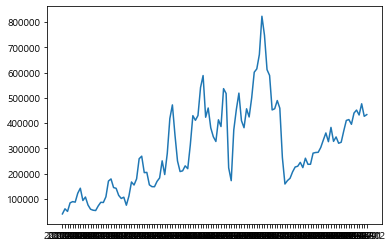

In [9]:
import matplotlib.pyplot as plt

condition = (df['국적'] == '중국')
df_filter = df[condition]

plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

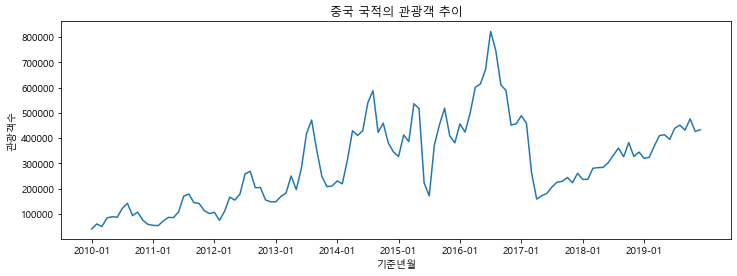

In [11]:
# 크기조절
plt.figure(figsize = (12, 4))

# 내용설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# X,Y축 이름
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금값
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])


plt.show()

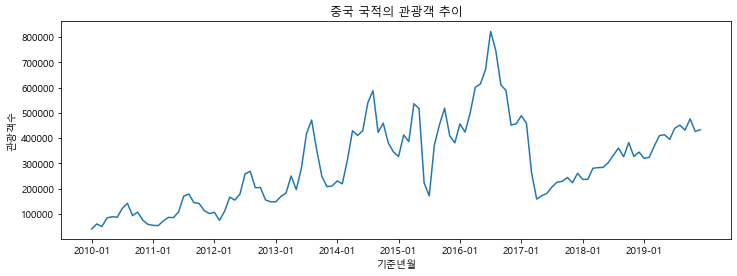

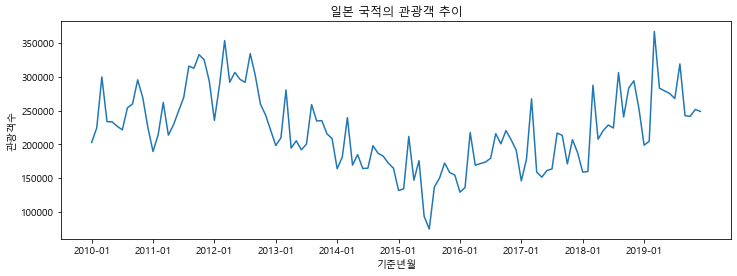

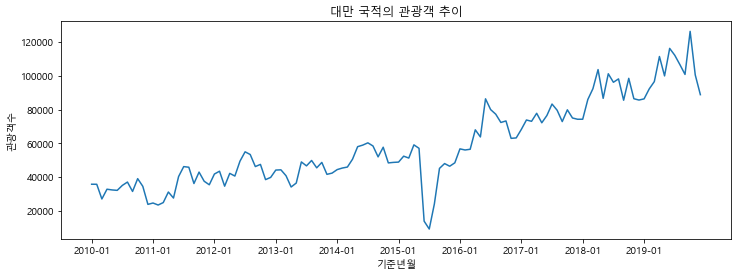

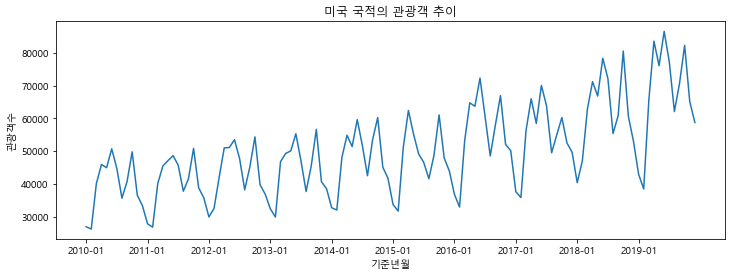

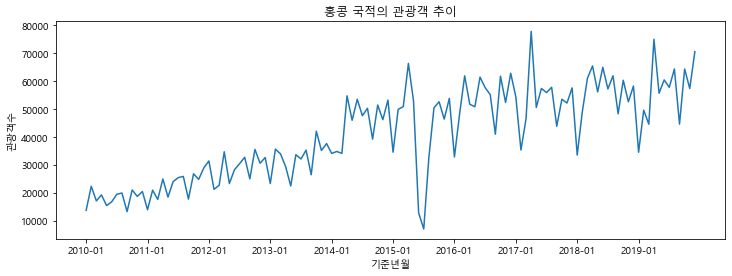

In [27]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
   
    
    plt.figure(figsize = (12, 4))
    
    plt.plot(df_filter['기준년월'], df_filter['관광'])
        
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

    plt.show()

In [30]:
df['년도'] = df['기준년월'].str.slice(0, 4)
df['월'] = df['기준년월'].str.slice(5, 7)

df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [33]:
condition = (df['국적'] == '중국')
df_filter = df[condition]

df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425,60590,50330,84252,89056,87080,122432,142180,93545,107237,75686,58987
2011,55070,53863,72003,86397,85668,108060,170524,178937,144704,141824,113856,101605
2012,106606,74895,110965,166843,154841,179074,258907,268988,203857,204866,155503,148320
2013,148118,169395,182850,250549,196306,280319,417991,472005,353359,249850,208175,210950
2014,230706,219533,313400,429419,410971,429991,540683,588181,423133,459708,381118,345957
2015,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,409635,381722
2016,456636,424232,500018,601460,614636,671493,823016,747818,611538,588561,452082,456882
2017,489256,458952,263788,158784,172527,181507,207099,226153,229172,244541,223743,260983
2018,236825,237075,281020,283533,284317,303405,332657,360982,326438,382922,327664,345135


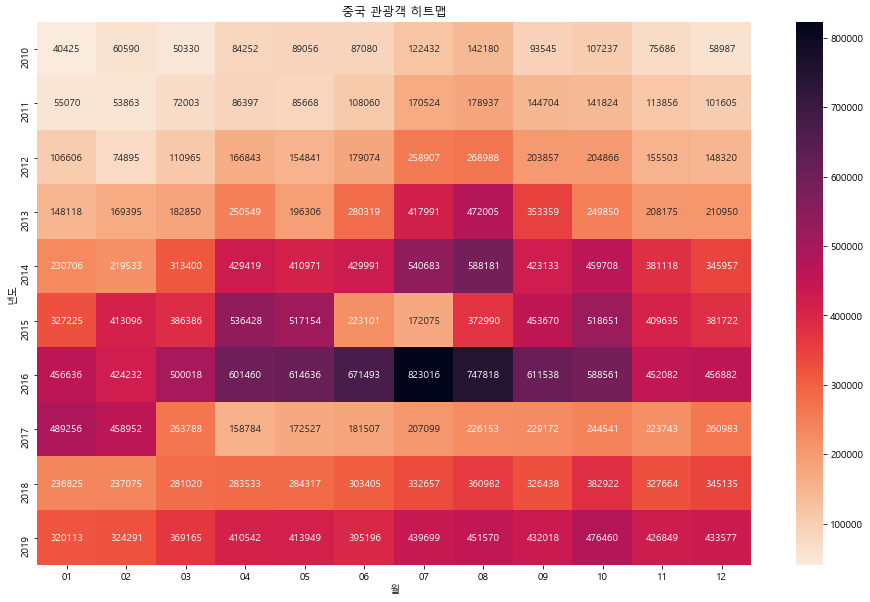

In [35]:
import seaborn as sns

# 사이즈
plt.figure(figsize = (16,10))

# 히트맵 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

# 타이틀
plt.title('중국 관광객 히트맵')

plt.show()

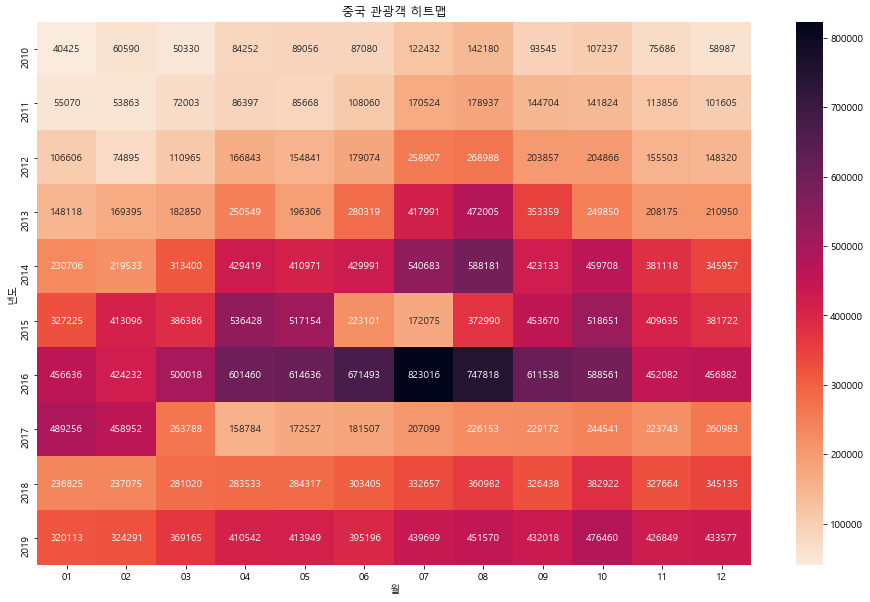

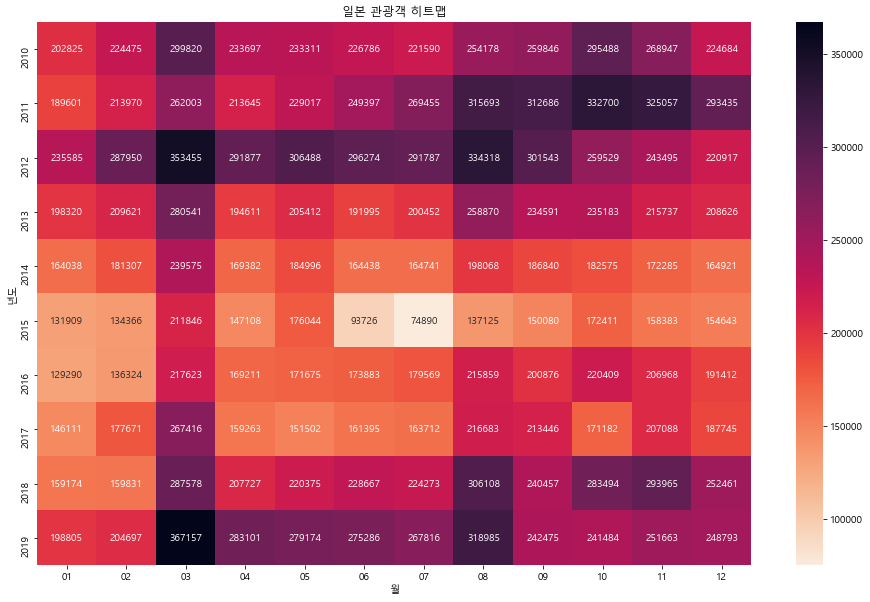

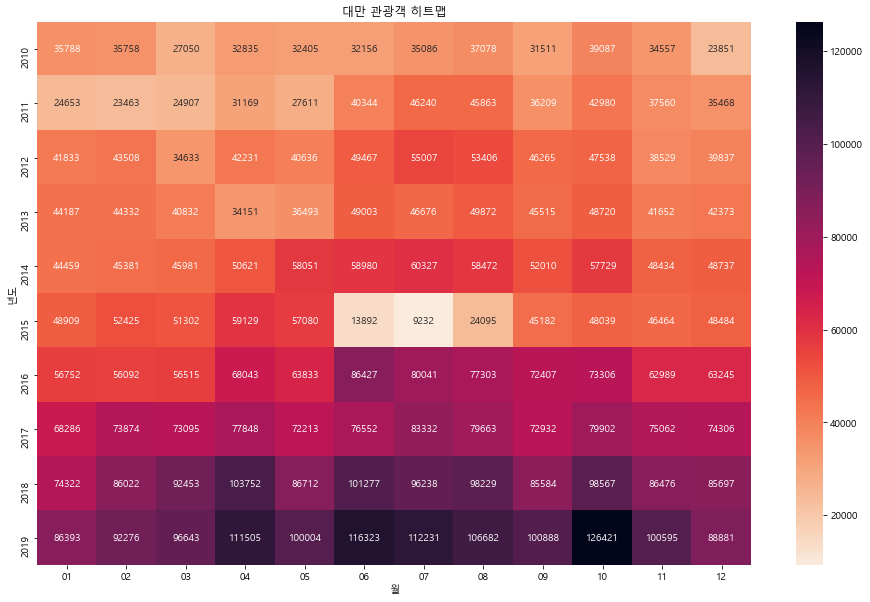

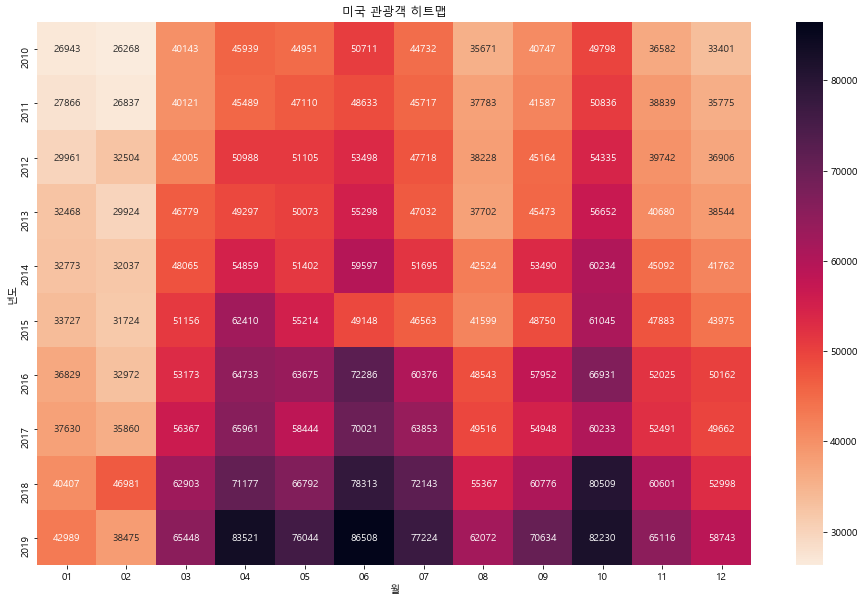

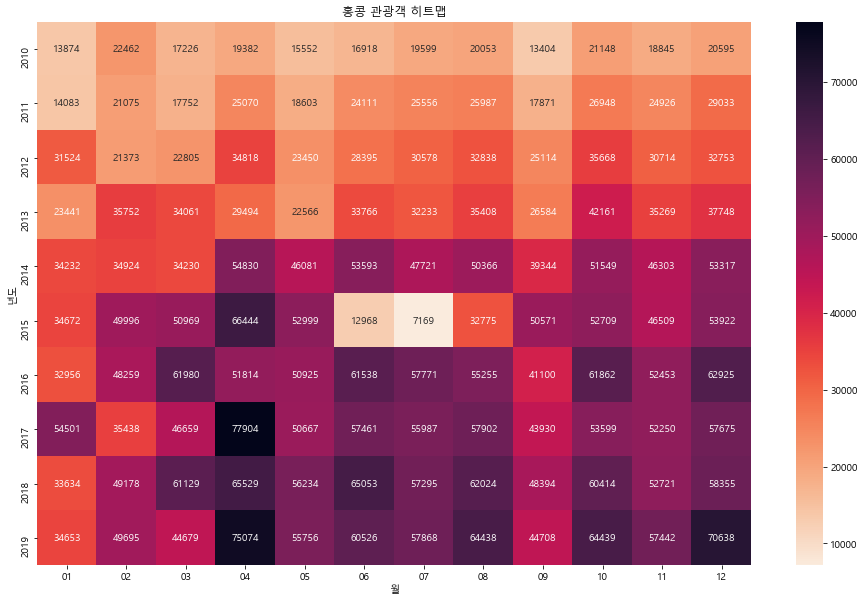

In [37]:
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')
   
    
    plt.figure(figsize = (16, 10))
    
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
    
    plt.title('{} 관광객 히트맵'.format(cntry))
    
    
    plt.show()